<a href="https://colab.research.google.com/github/bipanasapkota18/HOUSEPRICE7thSemProjekt/blob/main/HousePriceASHU7THSEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np

df=pd.read_csv('housing.csv')
df.head()

,Title,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Face,Year,Views,Area,Road,Road Width,Road Type,Build Area,Posted,Amenities
0,Flat System House On Sale At Budhanikantha : H...,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,West,2073.0,17,1-0-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,18-0-0-0 Aana,11 hours ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,21 Aana Beautiful House : House For Sale In Bu...,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,East,2073.0,26,0-21-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-0-0 Aana,12 hours ago,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Beautiful To Floor House : House For Sale In D...,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,East,2071.0,154,1-1-0-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,10-1-0-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Modern Architecture Bungalow House : House For...,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,West,2017.0,17,0-10-1-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-7-1-0 Aana,1 day ago,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Modern Bungalow House : House For Sale In Golf...,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,East,2070.0,59,0-19-2-0 Aana,20 Feet / Blacktopped,20 Feet,Blacktopped,0-14-2-0 Aana,2 days ago,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [80]:
# Display dataset information
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       2211 non-null   object 
 1   Address     2211 non-null   object 
 2   City        2211 non-null   object 
 3   Price       2211 non-null   int64  
 4   Bedroom     2211 non-null   int64  
 5   Bathroom    2211 non-null   int64  
 6   Floors      1039 non-null   float64
 7   Parking     2211 non-null   int64  
 8   Face        2211 non-null   object 
 9   Year        582 non-null    float64
 10  Views       2211 non-null   object 
 11  Area        2211 non-null   object 
 12  Road        2211 non-null   object 
 13  Road Width  2211 non-null   object 
 14  Road Type   1426 non-null   object 
 15  Build Area  2211 non-null   object 
 16  Posted      2211 non-null   object 
 17  Amenities   2211 non-null   object 
dtypes: float64(2), int64(4), object(12)
memory usage: 311

In [81]:
# Drop the 'Road' column
df=df.drop(columns=['Road','Title','Views','Posted','Build Area','Face'])

# Verify if the column is dropped
df.head()


,Address,City,Price,Bedroom,Bathroom,Floors,Parking,Year,Area,Road Width,Road Type,Amenities
0,"Budhanikantha, Budhanilkantha, Kathmandu",Kathmandu,90000000,6,3,2.0,10,2073.0,1-0-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,"Pasikot, Budhanilkantha, Kathmandu",Kathmandu,80000000,5,3,2.0,9,2073.0,0-21-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,"Dhapasi, Dhapasi, Kathmandu",Kathmandu,70000000,5,3,2.0,12,2071.0,1-1-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,"baluwatar, Baluwatar, Kathmandu",Kathmandu,130000000,6,4,3.0,9,2017.0,0-10-1-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,"Golfutar, Golfutar, Kathmandu",Kathmandu,100000000,6,3,2.0,10,2070.0,0-19-2-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."


In [82]:
# Extract the second value (index 1) from the Address column
df['Location'] = df['Address'].apply(lambda x: x.split(', ')[1] if len(x.split(', ')) > 1 else None)

# Check the updated DataFrame
print(df)

                                       Address       City      Price  Bedroom  \
0     Budhanikantha, Budhanilkantha, Kathmandu  Kathmandu   90000000        6   
1           Pasikot, Budhanilkantha, Kathmandu  Kathmandu   80000000        5   
2                  Dhapasi, Dhapasi, Kathmandu  Kathmandu   70000000        5   
3              baluwatar, Baluwatar, Kathmandu  Kathmandu  130000000        6   
4                Golfutar, Golfutar, Kathmandu  Kathmandu  100000000        6   
...                                        ...        ...        ...      ...   
2206               Bhangal, Chapali, Kathmandu  Kathmandu     500000        5   
2207            Nagarjun, Sitapaila, Kathmandu  Kathmandu   12000000        4   
2208    Deuja Chowk, Budhanilkantha, Kathmandu  Kathmandu   27000000        5   
2209         Bhimsengola, Baneshwor, Kathmandu  Kathmandu     300000        9   
2210          Gocha marg, Baluwatar, Kathmandu  Kathmandu   72500000        5   

      Bathroom  Floors  Par

In [83]:
from scipy import stats


# Perform ANOVA for City and Price
city_groups = [df[df['City'] == city]['Price'] for city in df['City'].unique()]
f_stat_city, p_value_city = stats.f_oneway(*city_groups)

print(f"City - F-statistic: {f_stat_city}")
print(f"City - P-value: {p_value_city}")

# Interpretation of the p-values
if p_value_city < 0.05:
    print("The 'City' feature significantly affects house prices.")
else:
    print("There is no significant difference in house prices based on 'City'.")



City - F-statistic: 0.38869601126673703
City - P-value: 0.9990787654580626
There is no significant difference in house prices based on 'City'.


In [84]:
from scipy import stats

# Perform ANOVA for Parking and Price
parking_groups = [df[df['Parking'] == parking]['Price'] for parking in df['Parking'].unique()]
f_stat_parking, p_value_parking = stats.f_oneway(*parking_groups)

print(f"Parking - F-statistic: {f_stat_parking}")
print(f"Parking - P-value: {p_value_parking}")

# Interpretation of the p-values
if p_value_parking < 0.05:
    print("The 'Parking' feature significantly affects house prices.")
else:
    print("There is no significant difference in house prices based on 'Parking'.")


Parking - F-statistic: 0.13423323300616655
Parking - P-value: 0.9999826865235197
There is no significant difference in house prices based on 'Parking'.


In [85]:
# Perform ANOVA for City and Price
location_groups = [df[df['Location'] == city]['Location'] for city in df['Location'].unique()]
f_stat_city, p_value_city = stats.f_oneway(*city_groups)

print(f"Location - F-statistic: {f_stat_city}")
print(f"Location - P-value: {p_value_city}")

# Interpretation of the p-values
if p_value_city < 0.05:
    print("The 'Location' feature significantly affects house prices.")
else:
    print("There is no significant difference in house prices based on 'Location'.")

Location - F-statistic: 0.38869601126673703
Location - P-value: 0.9990787654580626
There is no significant difference in house prices based on 'Location'.


In [86]:
# Display unique values in City and Location
unique_cities = df['City'].unique()
unique_locations = df['Location'].unique()

print("Unique values in City:")
print(unique_cities)
print("\nUnique values in Location:")
print(unique_locations)

Unique values in City:
['Kathmandu' 'Lalitpur' 'Pokhara' 'Bhaktapur' 'Chitwan' 'Butwal' 'Bara'
 'Birtamod' 'Dharan' 'Sunsari' 'Makwanpur' 'Nawalpur' 'Kirtipur'
 'Biratnagar' 'Parsa' 'Itahari' 'Jhapa' 'Mahottari' 'Dhading' 'Bardiya'
 'Morang' 'Dang' 'Kavre' 'Kaski' 'Surkhet' 'Bhairahawa' 'Kapilvastu'
 'Rupandehi' 'Tanahu' 'Illam' 'Nawalparasi' 'Kailali']

Unique values in Location:
['Budhanilkantha' 'Dhapasi' 'Baluwatar' 'Golfutar' 'Banasthali' 'Lubhu'
 'Sukedhara' 'Lekhnath' 'Chapali' 'Sitapaila' 'Narephate' 'Thankot'
 'Kalanki' 'Kavresthali' 'Sipadol' 'Radhe Radhe' 'Balaju' 'Imadol'
 'Pepsicola' 'Kapan' 'Mandikatar' 'Hattigauda' 'Tokha' 'Maligaon' 'Height'
 'Naikap' 'Balkot' 'Naya Bazar' 'Satungal' 'Tarkeshwor' 'Nakhundol'
 'Bhaktapur' 'Jorpati' 'Bharatpur' 'Raniban' 'Ratnanagar' 'Makalbari'
 'Mhepi' 'Pasikot' 'Buddha party palace' 'Swayambhu' 'Butwal'
 'near tempo park' 'Manamaiju' 'Syuchatar' 'Thulo Bharyang' 'Goldhunga'
 'Maharajgunj' 'Sirutar' 'Tikathali' 'Planning' 'Sankhamul' 'S

Since location and city ko eti impact chaina price ma but Nepal price prediction ma nepali city dekhaunu parne jasto huncha, so lets just keep kathmandu and 3 or more city

In [87]:
df.City.value_counts()


,count
City,
Kathmandu,1483
Lalitpur,432
Bhaktapur,85
Pokhara,64
Chitwan,33
Nawalparasi,12
Makwanpur,12
Dharan,11
Jhapa,10


In [88]:
city_counts = df.City.value_counts()
print(city_counts)
values_to_drop= city_counts[city_counts < 80].index.tolist()
print(values_to_drop)

City
Kathmandu      1483
Lalitpur        432
Bhaktapur        85
Pokhara          64
Chitwan          33
Nawalparasi      12
Makwanpur        12
Dharan           11
Jhapa            10
Sunsari           7
Kirtipur          7
Kavre             7
Butwal            6
Biratnagar        6
Bara              4
Dhading           4
Morang            4
Parsa             4
Itahari           3
Kaski             3
Rupandehi         3
Mahottari         1
Bardiya           1
Birtamod          1
Dang              1
Surkhet           1
Bhairahawa        1
Kapilvastu        1
Tanahu            1
Illam             1
Nawalpur          1
Kailali           1
Name: count, dtype: int64
['Pokhara', 'Chitwan', 'Nawalparasi', 'Makwanpur', 'Dharan', 'Jhapa', 'Sunsari', 'Kirtipur', 'Kavre', 'Butwal', 'Biratnagar', 'Bara', 'Dhading', 'Morang', 'Parsa', 'Itahari', 'Kaski', 'Rupandehi', 'Mahottari', 'Bardiya', 'Birtamod', 'Dang', 'Surkhet', 'Bhairahawa', 'Kapilvastu', 'Tanahu', 'Illam', 'Nawalpur', 'Kailali']


In [89]:
df1= df.loc[~df['City'].isin(values_to_drop)]

In [90]:
df1.City.value_counts()


,count
City,
Kathmandu,1483
Lalitpur,432
Bhaktapur,85


In [91]:
# Drop the Address column
df1 = df1.drop(columns=['Address','Location'], errors='ignore')

In [92]:
df1

,City,Price,Bedroom,Bathroom,Floors,Parking,Year,Area,Road Width,Road Type,Amenities
0,Kathmandu,90000000,6,3,2.0,10,2073.0,1-0-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
1,Kathmandu,80000000,5,3,2.0,9,2073.0,0-21-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Garage', 'Fencing', 'Frontyard', ..."
2,Kathmandu,70000000,5,3,2.0,12,2071.0,1-1-0-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
3,Kathmandu,130000000,6,4,3.0,9,2017.0,0-10-1-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Frontyard', 'Fe..."
4,Kathmandu,100000000,6,3,2.0,10,2070.0,0-19-2-0 Aana,20 Feet,Blacktopped,"['Parking', 'Lawn', 'Garage', 'Balcony', 'Back..."
...,...,...,...,...,...,...,...,...,...,...,...
2206,Kathmandu,500000,5,5,3.0,5,NaN,1 Ropani,16 Feet,NaN,"['Balcony', 'Frontyard', 'Garden', 'Drainage',..."
2207,Kathmandu,12000000,4,2,2.0,1,NaN,2.5 Aana,13 Feet,NaN,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2208,Kathmandu,27000000,5,3,2.0,1,2071.0,8 Aana,12 Feet,NaN,"['Balcony', 'Frontyard', 'Drainage', 'Water Su..."
2209,Kathmandu,300000,9,3,2.0,4,NaN,51 Aana,13 Feet,NaN,"['Drainage', 'Water Supply', 'Garden', 'Fronty..."


In [93]:
import ast

# Convert string representations of lists in the 'Amenities' column to actual lists
df1['Amenities'] = df1['Amenities'].apply(ast.literal_eval)

# Collect unique amenities across all rows
unique_amenities = set()

# Iterate through each row in the 'Amenities' column and update the unique_amenities set
for amenities_list in df1['Amenities']:
    unique_amenities.update(amenities_list)

# Print out the unique amenities
print("Unique Amenities:", unique_amenities)


Unique Amenities: {'Lift', 'Backyard', 'Garage', 'Lawn', 'Swimming Pool', 'Drainage', 'Security Staff', 'Water Supply', 'Wifi', 'Fencing', 'Garden', 'Air Condition', 'Deck', 'Microwave', 'Washing Machine', 'Solar Water', 'Jacuzzi', 'Frontyard', 'Cafeteria', 'Gym', 'Balcony', 'Modular Kitchen', 'Kids Playground', 'Intercom', 'TV Cable', 'Water Tank', 'Store Room', 'Maintenance', 'Internet', 'Parking', 'Electricity Backup', 'CCTV', 'Water Well'}


In [94]:
# Master list of amenities (updated with your unique amenities)
master_amenities = [
    'Parking', 'Lawn', 'Garage', 'Frontyard', 'Fencing', 'Balcony', 'Backyard',
    'Modular Kitchen', 'Garden', 'Water Supply', 'Drainage', 'Water Tank',
    'Wifi', 'Water Well', 'Solar Water', 'TV Cable', 'Microwave', 'CCTV',
    'Store Room', 'Intercom', 'Kids Playground', 'Gym', 'Air Condition',
    'Deck', 'Jacuzzi', 'Washing Machine', 'Security Staff', 'Internet',
    'Maintenance', 'Swimming Pool', 'Cafeteria', 'Electricity Backup', 'Lift'
]

# Convert the 'Amenities' column to numerical values based on the count of matching items
df1['Amenities_Count'] = df1['Amenities'].apply(
    lambda row: len([item for item in row if item in master_amenities])
)

# Check the updated DataFrame
print(df1)


           City      Price  Bedroom  Bathroom  Floors  Parking    Year  \
0     Kathmandu   90000000        6         3     2.0       10  2073.0   
1     Kathmandu   80000000        5         3     2.0        9  2073.0   
2     Kathmandu   70000000        5         3     2.0       12  2071.0   
3     Kathmandu  130000000        6         4     3.0        9  2017.0   
4     Kathmandu  100000000        6         3     2.0       10  2070.0   
...         ...        ...      ...       ...     ...      ...     ...   
2206  Kathmandu     500000        5         5     3.0        5     NaN   
2207  Kathmandu   12000000        4         2     2.0        1     NaN   
2208  Kathmandu   27000000        5         3     2.0        1  2071.0   
2209  Kathmandu     300000        9         3     2.0        4     NaN   
2210  Kathmandu   72500000        5         2     3.0        5     NaN   

               Area Road Width     Road Type  \
0      1-0-0-0 Aana   20 Feet    Blacktopped   
1     0-21-0-0 

In [95]:
df1=df1.drop(columns=['Amenities'])

In [96]:
df1

,City,Price,Bedroom,Bathroom,Floors,Parking,Year,Area,Road Width,Road Type,Amenities_Count
0,Kathmandu,90000000,6,3,2.0,10,2073.0,1-0-0-0 Aana,20 Feet,Blacktopped,16
1,Kathmandu,80000000,5,3,2.0,9,2073.0,0-21-0-0 Aana,20 Feet,Blacktopped,15
2,Kathmandu,70000000,5,3,2.0,12,2071.0,1-1-0-0 Aana,20 Feet,Blacktopped,16
3,Kathmandu,130000000,6,4,3.0,9,2017.0,0-10-1-0 Aana,20 Feet,Blacktopped,16
4,Kathmandu,100000000,6,3,2.0,10,2070.0,0-19-2-0 Aana,20 Feet,Blacktopped,16
...,...,...,...,...,...,...,...,...,...,...,...
2206,Kathmandu,500000,5,5,3.0,5,NaN,1 Ropani,16 Feet,NaN,5
2207,Kathmandu,12000000,4,2,2.0,1,NaN,2.5 Aana,13 Feet,NaN,4
2208,Kathmandu,27000000,5,3,2.0,1,2071.0,8 Aana,12 Feet,NaN,4
2209,Kathmandu,300000,9,3,2.0,4,NaN,51 Aana,13 Feet,NaN,6


In [97]:
# Extract only numerical columns
numerical_df = df1.select_dtypes(include=['int64', 'float64'])


In [98]:
numerical_df

,Price,Bedroom,Bathroom,Floors,Parking,Year,Amenities_Count
0,90000000,6,3,2.0,10,2073.0,16
1,80000000,5,3,2.0,9,2073.0,15
2,70000000,5,3,2.0,12,2071.0,16
3,130000000,6,4,3.0,9,2017.0,16
4,100000000,6,3,2.0,10,2070.0,16
...,...,...,...,...,...,...,...
2206,500000,5,5,3.0,5,NaN,5
2207,12000000,4,2,2.0,1,NaN,4
2208,27000000,5,3,2.0,1,2071.0,4
2209,300000,9,3,2.0,4,NaN,6


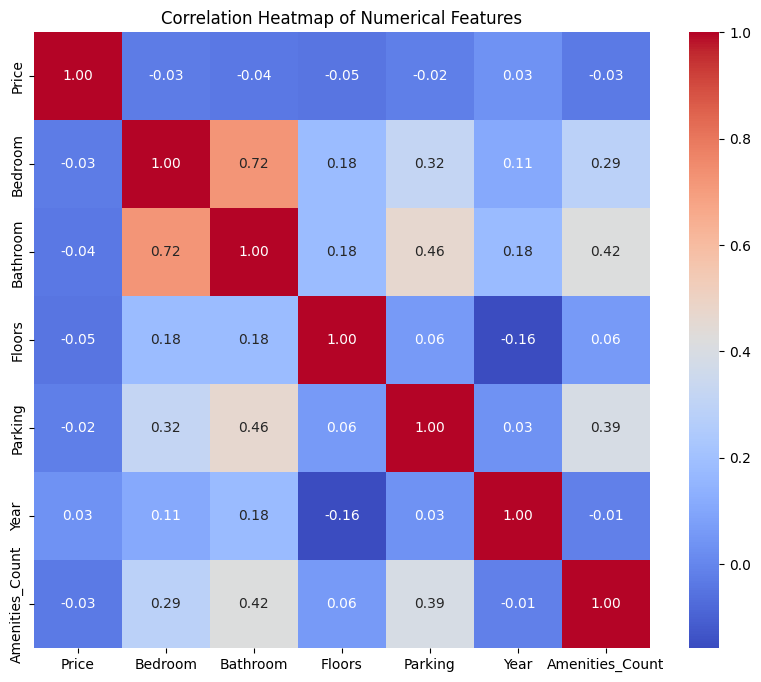

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


These features, in their current form, may not significantly contribute to predicting price in a linear model.
Relationships could still exist but may be nonlinear or dependent on combinations of features.//checked it manually it is not, so these numerical coloumn donot impact the price in the dataset so we could remove them.

In [100]:
# df1.drop(["Bedroom","Bathroom","Parking","Year"],axis=1,inplace=True)
df1.drop(["Parking","Year"],axis=1,inplace=True)


In [101]:
df1

,City,Price,Bedroom,Bathroom,Floors,Area,Road Width,Road Type,Amenities_Count
0,Kathmandu,90000000,6,3,2.0,1-0-0-0 Aana,20 Feet,Blacktopped,16
1,Kathmandu,80000000,5,3,2.0,0-21-0-0 Aana,20 Feet,Blacktopped,15
2,Kathmandu,70000000,5,3,2.0,1-1-0-0 Aana,20 Feet,Blacktopped,16
3,Kathmandu,130000000,6,4,3.0,0-10-1-0 Aana,20 Feet,Blacktopped,16
4,Kathmandu,100000000,6,3,2.0,0-19-2-0 Aana,20 Feet,Blacktopped,16
...,...,...,...,...,...,...,...,...,...
2206,Kathmandu,500000,5,5,3.0,1 Ropani,16 Feet,NaN,5
2207,Kathmandu,12000000,4,2,2.0,2.5 Aana,13 Feet,NaN,4
2208,Kathmandu,27000000,5,3,2.0,8 Aana,12 Feet,NaN,4
2209,Kathmandu,300000,9,3,2.0,51 Aana,13 Feet,NaN,6


In [102]:
import re

def convert_to_aana(area):
    area = area.strip()  # Remove any leading or trailing spaces

    # Check for "Ropani" and convert to Aana
    if "Ropani" in area:
        matches = re.findall(r'\d+\.?\d*', area)  # Extract numbers including decimals
        if matches:
            ropani = float(matches[0])
            return ropani * 16

    # Check for "Sq. Feet" and convert to Aana
    if "Sq. Feet" in area:
        matches = re.findall(r'\d+\.?\d*', area)
        if matches:
            sq_feet = float(matches[0])
            return sq_feet / 342.25  # Conversion factor: 1 Aana = 342.25 Sq. Feet

    # Check for "a-b-c-d Aana" format and convert
    if re.match(r'\d+-\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        a, b, c, d = parts
        return a * 16 + b + c / 4 + d / 16

    # Check for "x-y-z Aana" format and convert
    if re.match(r'\d+-\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y, z = parts
        return x + y / 4 + z / 16

    # Check for "x-y Aana" format and convert
    if re.match(r'\d+-\d+ Aana', area):
        parts = list(map(int, area.split(' ')[0].split('-')))
        x, y = parts
        return x + y / 4

    # Check for "X Aana" format (including decimals)
    if re.match(r'^\d+\.?\d* Aana$', area):
        return float(re.findall(r'\d+\.?\d*', area)[0])

    # If none of the formats match, return "Remove"
    return "Remove"


In [103]:
df1['Area'] = df1['Area'].apply(convert_to_aana)


In [104]:
df1

,City,Price,Bedroom,Bathroom,Floors,Area,Road Width,Road Type,Amenities_Count
0,Kathmandu,90000000,6,3,2.0,16.0,20 Feet,Blacktopped,16
1,Kathmandu,80000000,5,3,2.0,21.0,20 Feet,Blacktopped,15
2,Kathmandu,70000000,5,3,2.0,17.0,20 Feet,Blacktopped,16
3,Kathmandu,130000000,6,4,3.0,10.25,20 Feet,Blacktopped,16
4,Kathmandu,100000000,6,3,2.0,19.5,20 Feet,Blacktopped,16
...,...,...,...,...,...,...,...,...,...
2206,Kathmandu,500000,5,5,3.0,16.0,16 Feet,NaN,5
2207,Kathmandu,12000000,4,2,2.0,2.5,13 Feet,NaN,4
2208,Kathmandu,27000000,5,3,2.0,8.0,12 Feet,NaN,4
2209,Kathmandu,300000,9,3,2.0,51.0,13 Feet,NaN,6


In [105]:
df1.Area.value_counts().get('Remove',0)


65

In [106]:
df1= df1[df1.Area != 'Remove']


In [107]:
df1.shape

(1935, 9)

In [108]:
def convert_to_feet(value):
    if 'Meter' in value:
        # Extract the numerical part, convert to float, and multiply by 3.28084 to convert to feet
        meters = int(float(value.replace(' Meter', '')))
        return meters * 3.28084
    elif 'Feet' in value:
        # Extract the numerical part and return as is
        return int(float(value.replace(' Feet', '')))
    else:
        return "Remove"

In [109]:
df1['Road Width'] = df1['Road Width'].apply(convert_to_feet)


<ipython-input-109-0a3fe2b3bce1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Road Width'] = df1['Road Width'].apply(convert_to_feet)


In [110]:
df1['Road Width'].value_counts().get('Remove',0)


0

In [111]:
df1.head(7)

,City,Price,Bedroom,Bathroom,Floors,Area,Road Width,Road Type,Amenities_Count
0,Kathmandu,90000000,6,3,2.0,16.0,20.0,Blacktopped,16
1,Kathmandu,80000000,5,3,2.0,21.0,20.0,Blacktopped,15
2,Kathmandu,70000000,5,3,2.0,17.0,20.0,Blacktopped,16
3,Kathmandu,130000000,6,4,3.0,10.25,20.0,Blacktopped,16
4,Kathmandu,100000000,6,3,2.0,19.5,20.0,Blacktopped,16
5,Kathmandu,100000000,5,6,3.0,12.8125,13.0,Blacktopped,16
6,Lalitpur,11000000,3,4,3.0,3.3125,11.0,Gravelled,2


In [112]:
print(df1['Road Type'].value_counts())

Road Type
Blacktopped        655
Gravelled          341
Soil Stabilized    136
Paved               67
Concrete            24
Alley                2
Name: count, dtype: int64


In [113]:
df1["Road Type"].unique()


array([' Blacktopped', ' Gravelled', ' Concrete', ' Paved', nan,
       ' Soil Stabilized', ' Alley'], dtype=object)

According to online search:-paved/concrete can be blacktopped so we will only use that

also we will convert all nan to soil stablilized as it the default road type/common in nepal

In [114]:
# Step 1: Replace 'Paved' and 'Concrete' with 'Blacktopped'
df1.loc[df['Road Type'].isin([' Paved', ' Concrete']), 'Road Type'] = 'Blacktopped'

# Step 2: Fill missing (NaN) values with a default category (e.g., 'Gravel' or 'Unpaved')
df1['Road Type'] = df1['Road Type'].fillna('Soil Stabilized')

# Step 3: Remove leading and trailing spaces from 'Road Type'
df1['Road Type'] = df1['Road Type'].str.strip()

<ipython-input-114-073aaf66f2ec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Road Type'] = df1['Road Type'].fillna('Soil Stabilized')
<ipython-input-114-073aaf66f2ec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Road Type'] = df1['Road Type'].str.strip()


In [115]:
df1['Road Type'].value_counts()

,count
Road Type,
Soil Stabilized,846
Blacktopped,746
Gravelled,341
Alley,2


In [116]:
df1 = df1[df1['Road Type'] != 'Alley']


In [117]:
df1['Road Type'].value_counts()

,count
Road Type,
Soil Stabilized,846
Blacktopped,746
Gravelled,341


In [118]:
df1.isnull().sum()

,0
City,0
Price,0
Bedroom,0
Bathroom,0
Floors,999
Area,0
Road Width,0
Road Type,0
Amenities_Count,0


In [119]:
df1['Floors'].mean()


2.89330835117773

In [120]:
df1['Floors'] = df['Floors'].fillna(2.80)

<ipython-input-120-7ea06a69bc47>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Floors'] = df['Floors'].fillna(2.80)


In [121]:
df1.isnull().sum()

,0
City,0
Price,0
Bedroom,0
Bathroom,0
Floors,0
Area,0
Road Width,0
Road Type,0
Amenities_Count,0


In [122]:
df1.head()

,City,Price,Bedroom,Bathroom,Floors,Area,Road Width,Road Type,Amenities_Count
0,Kathmandu,90000000,6,3,2.0,16.0,20.0,Blacktopped,16
1,Kathmandu,80000000,5,3,2.0,21.0,20.0,Blacktopped,15
2,Kathmandu,70000000,5,3,2.0,17.0,20.0,Blacktopped,16
3,Kathmandu,130000000,6,4,3.0,10.25,20.0,Blacktopped,16
4,Kathmandu,100000000,6,3,2.0,19.5,20.0,Blacktopped,16


In [123]:
df1 = df1[(df1['Price'] >=10000000 ) & (df1['Price'] <=100000000 )]


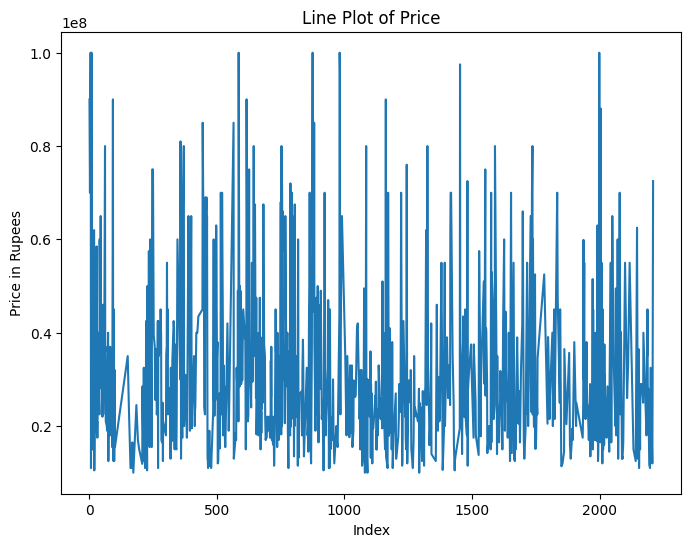

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df1['Price'].plot(kind='line')

# Add labels and title
plt.title('Line Plot of Price')
plt.xlabel('Index')
plt.ylabel('Price in Rupees')

# Show the plot
plt.show()

In [125]:
df1.shape


(915, 9)

Text(0, 0.5, 'Average Price')

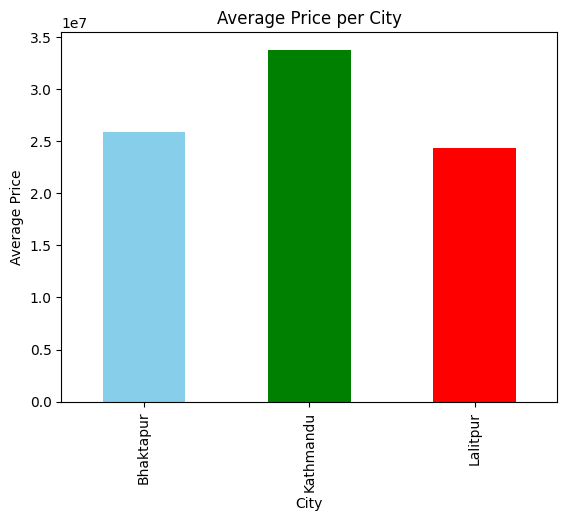

In [126]:
avg_price_per_city = df1.groupby('City')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'green', 'red'])
plt.title('Average Price per City')
plt.xlabel('City')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

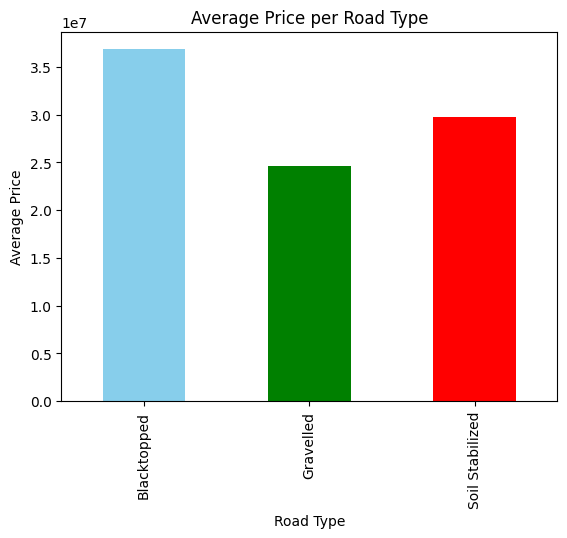

In [127]:
avg_price_per_city = df1.groupby('Road Type')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'green', 'red'])
plt.title('Average Price per Road Type')
plt.xlabel('Road Type')
plt.ylabel('Average Price')

Text(0, 0.5, 'Average Price')

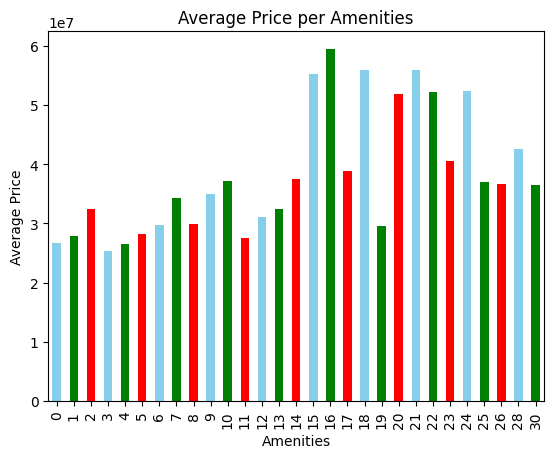

In [128]:
avg_price_per_city = df1.groupby('Amenities_Count')['Price'].mean()
avg_price_per_city.plot(kind='bar', color=['skyblue', 'green', 'red'])
plt.title('Average Price per Amenities')
plt.xlabel('Amenities')
plt.ylabel('Average Price')

In [129]:
df1.shape

(915, 9)

In [130]:
# Apply one-hot encoding to only 'City' and 'Road Type'
encoded_columns = pd.get_dummies(df1[['City', 'Road Type']], dtype=int)

# Drop the original 'City' and 'Road Type' columns
df1= df1.drop(['City', 'Road Type'], axis=1)

# Concatenate the one-hot encoded columns to the DataFrame
df1 = pd.concat([df1, encoded_columns], axis=1)

In [131]:
df1

,Price,Bedroom,Bathroom,Floors,Area,Road Width,Amenities_Count,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road Type_Blacktopped,Road Type_Gravelled,Road Type_Soil Stabilized
0,90000000,6,3,2.0,16.0,20.0,16,0,1,0,1,0,0
1,80000000,5,3,2.0,21.0,20.0,15,0,1,0,1,0,0
2,70000000,5,3,2.0,17.0,20.0,16,0,1,0,1,0,0
4,100000000,6,3,2.0,19.5,20.0,16,0,1,0,1,0,0
5,100000000,5,6,3.0,12.8125,13.0,16,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,11000000,3,2,6.0,3.903579,20.0,8,0,1,0,0,0,1
2200,32500000,0,0,5.0,3.0,25.0,10,0,1,0,0,0,1
2207,12000000,4,2,2.0,2.5,13.0,4,0,1,0,0,0,1
2208,27000000,5,3,2.0,8.0,12.0,4,0,1,0,0,0,1


In [132]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      915 non-null    int64  
 1   Bedroom                    915 non-null    int64  
 2   Bathroom                   915 non-null    int64  
 3   Floors                     915 non-null    float64
 4   Area                       915 non-null    object 
 5   Road Width                 915 non-null    float64
 6   Amenities_Count            915 non-null    int64  
 7   City_Bhaktapur             915 non-null    int64  
 8   City_Kathmandu             915 non-null    int64  
 9   City_Lalitpur              915 non-null    int64  
 10  Road Type_Blacktopped      915 non-null    int64  
 11  Road Type_Gravelled        915 non-null    int64  
 12  Road Type_Soil Stabilized  915 non-null    int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 132.

In [133]:
# Function to clean and convert Area to float
def convert_area_to_float(area):
    # Remove non-numeric characters and convert to float
    area = re.sub(r'[^\d.]', '', str(area))
    try:
        return float(area)
    except ValueError:
        return None  # In case of invalid conversion, return None

# Apply the function to the 'Area' column
df1['Area'] = df1['Area'].apply(convert_area_to_float)

In [134]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 915 entries, 0 to 2210
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Price                      915 non-null    int64  
 1   Bedroom                    915 non-null    int64  
 2   Bathroom                   915 non-null    int64  
 3   Floors                     915 non-null    float64
 4   Area                       915 non-null    float64
 5   Road Width                 915 non-null    float64
 6   Amenities_Count            915 non-null    int64  
 7   City_Bhaktapur             915 non-null    int64  
 8   City_Kathmandu             915 non-null    int64  
 9   City_Lalitpur              915 non-null    int64  
 10  Road Type_Blacktopped      915 non-null    int64  
 11  Road Type_Gravelled        915 non-null    int64  
 12  Road Type_Soil Stabilized  915 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 132.4 KB


In [135]:
df1.isnull().sum()

,0
Price,0
Bedroom,0
Bathroom,0
Floors,0
Area,0
Road Width,0
Amenities_Count,0
City_Bhaktapur,0
City_Kathmandu,0
City_Lalitpur,0


In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1['Price'] = scaler.fit_transform(df1[['Price']])

In [137]:
df1.head()

,Price,Bedroom,Bathroom,Floors,Area,Road Width,Amenities_Count,City_Bhaktapur,City_Kathmandu,City_Lalitpur,Road Type_Blacktopped,Road Type_Gravelled,Road Type_Soil Stabilized
0,3.258841,6,3,2.0,16.0000,20.0,16,0,1,0,1,0,0
1,2.699934,5,3,2.0,21.0000,20.0,15,0,1,0,1,0,0
2,2.141026,5,3,2.0,17.0000,20.0,16,0,1,0,1,0,0
4,3.817749,6,3,2.0,19.5000,20.0,16,0,1,0,1,0,0
5,3.817749,5,6,3.0,12.8125,13.0,16,0,1,0,1,0,0


In [138]:
X = df1.drop('Price', axis=1)
y = df1['Price']

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [140]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
score=regressor.score(X_test,y_test)
print(score)

0.6449274571942141


In [141]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Split your data into X and y (you already have this part)
# Assuming X and y are already defined

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': xgb.XGBRegressor(),
    'Support Vector Regressor': SVR()
}

# Function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = model.score(X_test, y_test)  # R-squared score
        mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
        results[model_name] = {'R2 Score': score, 'MSE': mse}

    return results

# Evaluate the models
model_results = evaluate_models(models, X_train, X_test, y_train, y_test)

# Display the results
import pandas as pd
model_results_df = pd.DataFrame(model_results).T
print(model_results_df)


                          R2 Score       MSE
Linear Regression         0.317498  0.721272
Random Forest             0.802133  0.209108
Gradient Boosting         0.775920  0.236809
XGBoost                   0.777903  0.234714
Support Vector Regressor  0.674224  0.344282


Hyperparameter Tuning with GridSearchCV:

> Add blockquote




In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor(random_state=5)

# Expanded parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 10],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict
best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the performance of the tuned model
from sklearn.metrics import mean_squared_error, r2_score
print("Tuned R2 Score:", r2_score(y_test, y_pred_best))
print("Tuned MSE:", mean_squared_error(y_test, y_pred_best))


Fitting 3 folds for each of 1920 candidates, totalling 5760 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1920 fits failed out of a total of 5760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1920 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.p

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Tuned R2 Score: 0.776189463422723
Tuned MSE: 0.2365243410015577


In [143]:
from sklearn.metrics import mean_absolute_error, explained_variance_score

# Evaluate on test data
mae = mean_absolute_error(y_test, y_pred_best)
evs = explained_variance_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae}")
print(f"Explained Variance Score: {evs}")


Mean Absolute Error: 0.34469745345965797
Explained Variance Score: 0.7762198328769963


The MAE shows how close the predictions are to the actual values on average. Lower is better.
Think of MAE as the average difference between the predicted house prices and the actual house prices.



The Explained Variance Score shows how much of the data's patterns the model has learned. Higher is better.
A score of 0.7762 (or 77.62%) means the model captures about 77.62% of the patterns and trends in the data related to house prices.
The remaining 22.38% is variability in the data that the model doesn't explain, possibly due to noise

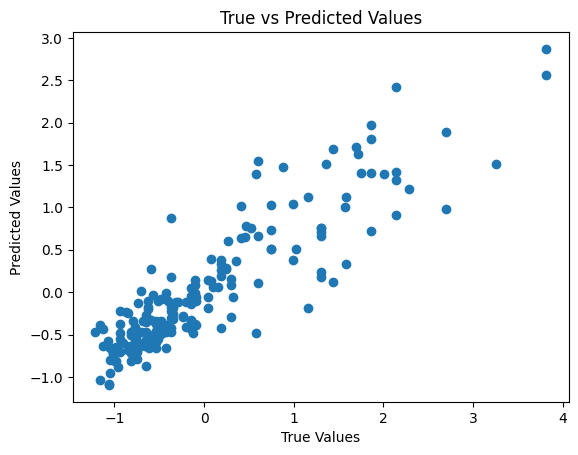

In [144]:
import matplotlib.pyplot as plt

# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred_best)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.show()


In [145]:
import numpy as np

# Input features (including Floors)
input_features = [[
    5,   # Bedroom
    2,   # Bathroom
    2,   # Floors (add the correct value)
    14.00,  # Area
    17.25,  # Road Width
    19,  # Amenities_Count
    0,   # City_Bhaktapur
    1,   # City_Kathmandu
    0,   # City_Lalitpur
    1,   # Road Type_Blacktopped
    0,   # Road Type_Gravelled
    0    # Road Type_Soil Stabilized
]]

# Predict the scaled price using the trained model
scaled_price_pred = best_rf_model.predict(input_features)

# Inverse transform to get the actual price
price_pred_actual = scaler.inverse_transform(np.array(scaled_price_pred).reshape(-1, 1))

# Display the predicted price
print("Predicted House Price:", price_pred_actual[0][0])


Predicted House Price: 64073947.78349091


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
